In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/cleaned_stroke_data.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 11)

In [5]:
df.nunique()

gender                  3
age                    83
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [6]:
#searching for duplicates in the dataset
print(f'Duplicates in data set: {df.duplicated().sum()}, ({np.round(100*df.duplicated().sum()/len(df),1)}%)')

Duplicates in data set: 0, (0.0%)


In [7]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### STATISTICAL INFERENCES 
- Median age of population is 43 years.
- 25% of the population is aged below 25
- Another 25% is aged above 60 and remaining in between these ages.
- Average glucose levels of the population is 106
- About 9.7% and 5.4% of population suffers from hypertension and heart disease respectively.
- People with higher BMI (BMI > 45) are less represented. This can affect our machine learning models significantly.

In [8]:
#creating a copy of dataset for the visualization
eda_df= df.copy()
#change values 1, 0 to have the issue or not
eda_df['hypertension'] = np.where(eda_df['hypertension'] == 1, 'Hypertension', 'No hypertension')
eda_df['heart_disease'] = np.where(eda_df['heart_disease'] == 1, 'Heart disease', 'No heart disease')
eda_df['stroke'] = np.where(eda_df['stroke'] == 1, 'Stroke', 'No stroke')
eda_df['ever_married'] = np.where(eda_df['ever_married'] == 'Yes', 'Ever married', 'Never')

#explore first five rows in the dataset
eda_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,No hypertension,Heart disease,Ever married,Private,Urban,228.69,36.6,formerly smoked,Stroke
1,Female,61,No hypertension,No heart disease,Ever married,Self-employed,Rural,202.21,NaN,never smoked,Stroke
2,Male,80,No hypertension,Heart disease,Ever married,Private,Rural,105.92,32.5,never smoked,Stroke
3,Female,49,No hypertension,No heart disease,Ever married,Private,Urban,171.23,34.4,smokes,Stroke
4,Female,79,Hypertension,No heart disease,Ever married,Self-employed,Rural,174.12,24.0,never smoked,Stroke


In [9]:
print('Percentage of population which has 35 < BMI < 45 : {:0.2f}%'.format(df[(df['bmi'] < 45) & (df['bmi'] > 35)].shape[0]*100/df.shape[0]))
print('Percentage of population which has 45 < BMI < 60 : {:0.2f}%'.format(df[(df['bmi'] < 60) & (df['bmi'] > 45)].shape[0]*100/df.shape[0]))

Percentage of population which has 35 < BMI < 45 : 14.64%
Percentage of population which has 45 < BMI < 60 : 2.78%


## UNIVARIATE ANALYSIS
### CATEGORICAL FEAURES

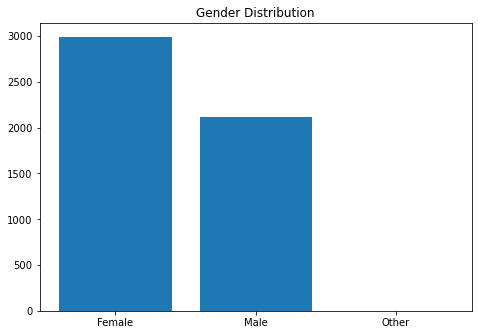

Percentage of Females:  0.5859099804305283
Percentage of Males:  0.41389432485322897
Percentage of Other:  0.00019569471624266145


In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ["Female", "Male", "Other"]
x = df["gender"].value_counts()['Female']
y = df["gender"].value_counts()['Male']
z = df["gender"].value_counts()['Other']
counts = [x, y, z]
ax.bar(gender, counts)
plt.title("Gender Distribution")
plt.show()

print("Percentage of Females: ", x /(x+y+z))
print("Percentage of Males: ", y /(x+y+z))
print("Percentage of Other: ", z /(x+y+z))

#### GENDER INFERENCE
- Greater amount of female patients than male patients in the dataset.
- Almost no patients in the gender category of "other", So we can drop it.

In [11]:
dt2=pd.DataFrame.copy(df)
bins=[0,10,20,30,40,50,60,70,80,90]
labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90']
dt2['age_group']=pd.cut(df['age'],bins=bins,labels=labels)

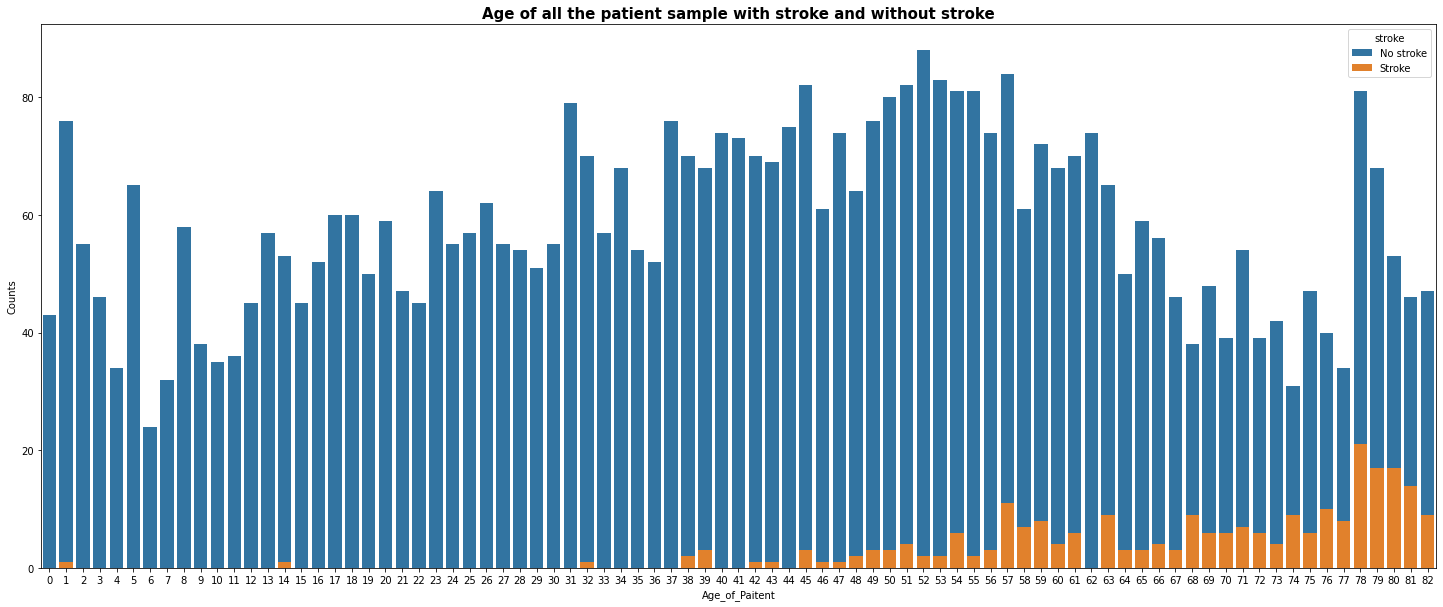

In [12]:
plt.figure(figsize=[25,10])
sns.countplot(data=eda_df.sort_values('age'),x='age',hue='stroke',dodge=False);
plt.title('Age of all the patient sample with stroke and without stroke' , fontsize = 15, fontweight ='bold');
plt.xlabel('Age_of_Paitent')
plt.ylabel('Counts')
plt.show()

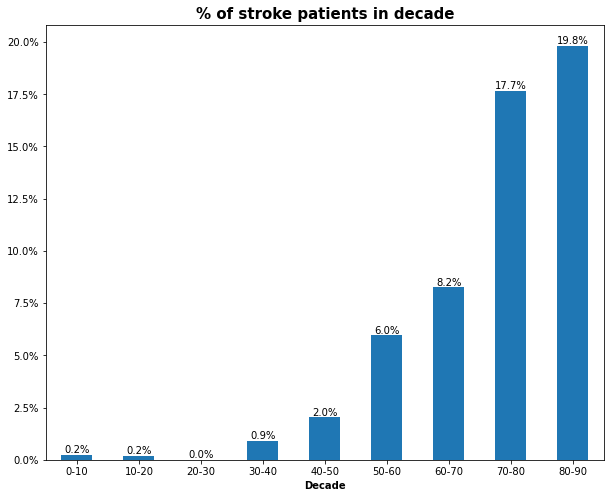

In [13]:
import matplotlib.ticker as mtick

plt.figure(figsize=[10,8])

(100*dt2[dt2["stroke"].isin([1])]['age_group'].value_counts()/dt2['age_group'].value_counts()).plot(kind='bar' , stacked=True , colormap='tab20' )
plt.title("% of stroke patients in decade" , fontsize = 15, fontweight ='bold'  )
order1 = (100*dt2[dt2["stroke"].isin([1])]['age_group'].value_counts()/dt2['age_group'].value_counts())
for n in range(order1.shape[0]):
    count = order1[n]
    strt='{:0.1f}%'.format(count)
    plt.text(n,count+0.1,strt,ha='center')

plt.style.context('ggplot')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xlabel('Decade' , fontweight ='bold')
plt.xticks(rotation=0)
plt.show()

#### AGE INFERENCE
- The age distribution  shows that the age data is slightly skewed left
- Greater number of patients from older age groups.

#### BMI parameter can be divided into four categories [ Under_weight / Normal_weight / Over_weight / Obese ] 

The Categories of BMI :

- Under_weight ( BMI < 18.5 )
- Normal_weight ( 18.5 < BMI < 25 )
- Over_weight ( 25 < BMI < 30 )
- Obese ( BMI > 30 )

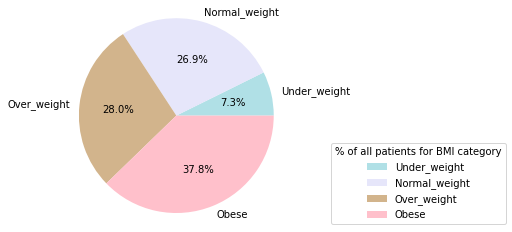

In [14]:
fig1, ax1 = plt.subplots()
ax1.pie(x=[eda_df[eda_df['bmi'] <= 18.5]['stroke'].value_counts()[0] , 
   eda_df[(eda_df['bmi'] <= 25) & (eda_df['bmi'] > 18)]['stroke'].value_counts()[0] , 
   eda_df[(eda_df['bmi'] <= 30) & (eda_df['bmi'] > 25)]['stroke'].value_counts()[0] , 
   eda_df[eda_df['bmi'] > 30]['stroke'].value_counts()[0] ], 
    labels=['Under_weight','Normal_weight','Over_weight','Obese'] , 
    pctdistance=0.6 , radius=6  , autopct='%1.1f%%' , 
    colors=['powderblue','lavender','tan','pink'] )

ax1.axis('equal')
plt.legend(title = "% of all patients for BMI category" , loc=1 , bbox_to_anchor=(1.5, 0.4))
plt.show() 

<Figure size 1800x864 with 0 Axes>

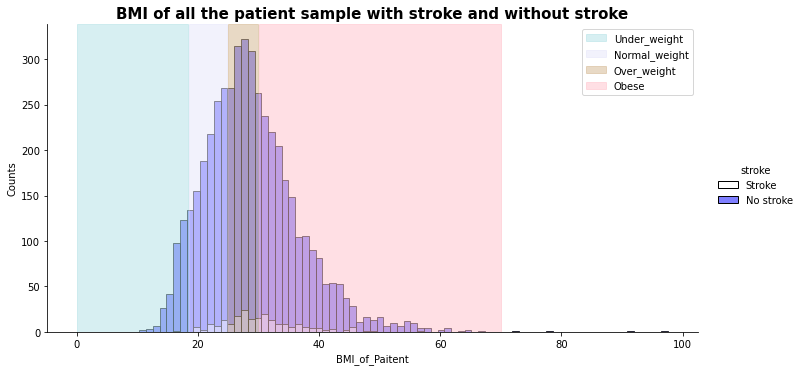

In [15]:
plt.figure(figsize=[25,12])
sns.displot(data=eda_df,x='bmi',hue='stroke' , aspect=2 , palette='flag' )
plt.title('BMI of all the patient sample with stroke and without stroke' , fontsize = 15, fontweight ='bold')
plt.axvspan(0, 18.4, color='powderblue', alpha=0.5)
plt.axvspan(18.5, 24.8, color='lavender', alpha=0.5)
plt.axvspan(25, 29.9, color='tan', alpha=0.5)
plt.axvspan(30, 70, color='pink', alpha=0.5)

plt.xlabel('BMI_of_Paitent')
plt.ylabel('Counts')
plt.legend(labels=['Under_weight','Normal_weight','Over_weight','Obese'])

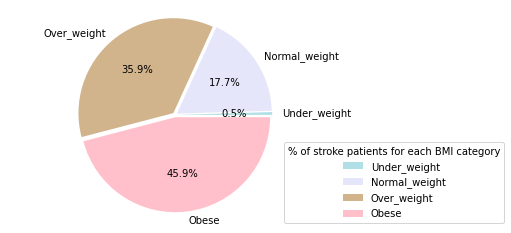

In [16]:
fig1, ax1 = plt.subplots()
ax1.pie(x=[eda_df[eda_df['bmi'] <= 18.5]['stroke'].value_counts()[1] , 
   eda_df[(eda_df['bmi'] <= 25) & (eda_df['bmi'] > 18)]['stroke'].value_counts()[1] , 
   eda_df[(eda_df['bmi'] <= 30) & (eda_df['bmi'] > 25)]['stroke'].value_counts()[1] , 
   eda_df[eda_df['bmi'] > 30]['stroke'].value_counts()[1] ], 
    labels=['Under_weight','Normal_weight','Over_weight','Obese'] , 
    pctdistance=0.6 , radius=6 , explode=(0.15, 0.15, 0.15, 0.15) , autopct='%1.1f%%' ,
    colors=['powderblue','lavender','tan','pink'] )


ax1.axis('equal')
plt.legend(title = "% of stroke patients for each BMI category" , loc=1 , bbox_to_anchor=(1.5, 0.4))
plt.show() 

#### BMI INFERENCE
- The stroke is dependes on the Body mass index 
- The most of the stroke patients are who have over weight and there BMI is more than 25.

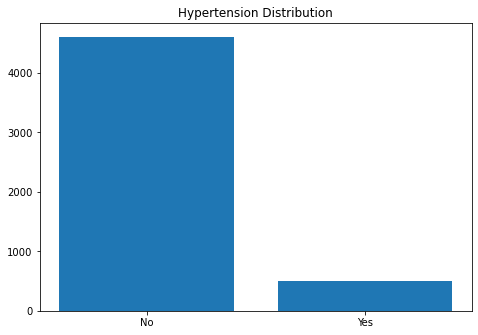

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = ["No", "Yes"]
x = df["hypertension"].value_counts()[0]
y = df["hypertension"].value_counts()[1]
counts = [x, y]
ax.bar(values, counts)
plt.title("Hypertension Distribution")
plt.show()

#### HYPERTENSION INFERENCE
- we can see that the amount of patients with hypertension is significantly less than those with hypertension.

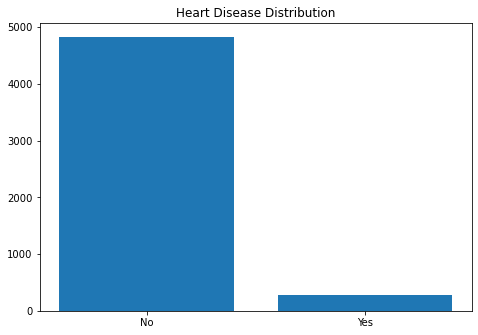

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = ["No", "Yes"]
x = df["heart_disease"].value_counts()[0]
y = df["heart_disease"].value_counts()[1]
counts = [x, y]
ax.bar(values, counts)
plt.title("Heart Disease Distribution")
plt.show()

#### HEART DISEASE INFERENCE
- More patients without heart disease than with heart disease in the dataset.

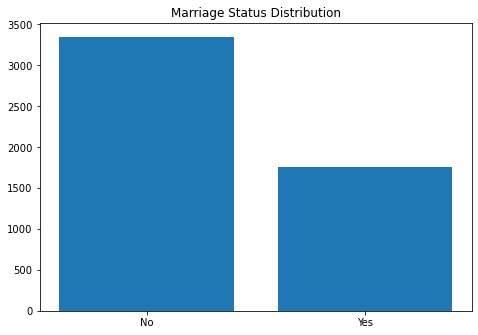

Amount of Patients who have been married:  1757
Amount of Patients who have been never married:  3353


In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = df["ever_married"].value_counts()[0]
y = df["ever_married"].value_counts()[1]
counts = [x, y]
ax.bar(values, counts)
plt.title("Marriage Status Distribution")
plt.show()
print("Amount of Patients who have been married: ", y)
print("Amount of Patients who have been never married: ", x)

#### MARRIAGE STATUS INFERENCE
-  Amount of patients who have been married is slightly more than half of the amount of patients who have never been married.

Private:  2925
Self Employed:  819
Government Job:  657
Children:  687
Never Worked:  22


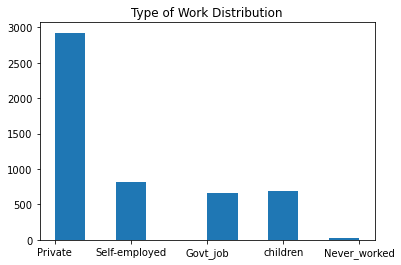

In [20]:
plt.hist(df["work_type"])
plt.title("Type of Work Distribution")

private = df["work_type"].value_counts()["Private"]
self_employed = df["work_type"].value_counts()["Self-employed"]
govt_job = df["work_type"].value_counts()["Govt_job"]
children = df["work_type"].value_counts()["children"]
never_worked = df["work_type"].value_counts()["Never_worked"]

print("Private: ", private)
print("Self Employed: ", self_employed)
print("Government Job: ", govt_job)
print("Children: ", children)
print("Never Worked: ", never_worked)

#### TYPE_OF_WORK INFERENCE

- The greatest amount of patients with a private work type.
- The least amount of patients with no work experience.

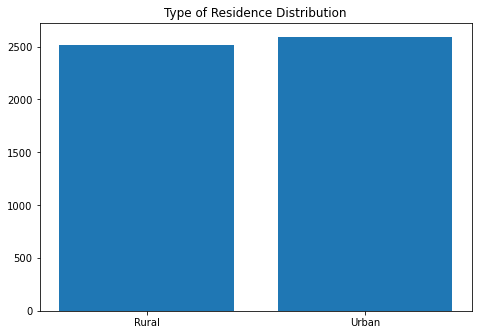

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
values = ["Rural", "Urban"]
x = df["Residence_type"].value_counts()["Rural"]
y = df["Residence_type"].value_counts()["Urban"]
counts = [x, y]
ax.bar(values, counts)
plt.title("Type of Residence Distribution")
plt.show()

#### TYPE OF RESIDENCE INFERENCE

- The Amount of patients that reside in rural areas seems to be roughly equal to the amount of patients that reside in urban areas.

Text(0.5, 1.0, 'Smoking Status Distribution')

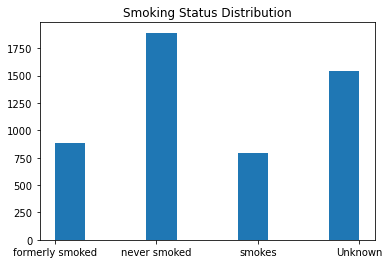

In [22]:
plt.hist(df["smoking_status"])
plt.title("Smoking Status Distribution")

#### SMOKING_STATUS INFERENCE

- Of the patients whose smoking status is known, the greatest amount are those who have never smoked.

### NUMERICAL COLUMNS

Median:  91.88499999999999
Mean:  106.14767710371804


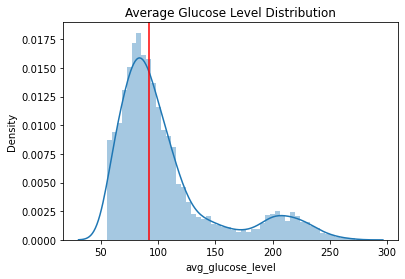

In [23]:
sns.distplot(df['avg_glucose_level']).set(title="Average Glucose Level Distribution")
plt.axvline(x=df.avg_glucose_level.median(), color='red')
print("Median: ", df.avg_glucose_level.median())

print("Mean: ", df.avg_glucose_level.mean())

#### GLUCOSE_LEVEL INFERENCE

- The average glucose level distribution is skewed right.
- With a major peak around roughly 80 and a smaller peak around 210.

Median:  28.1


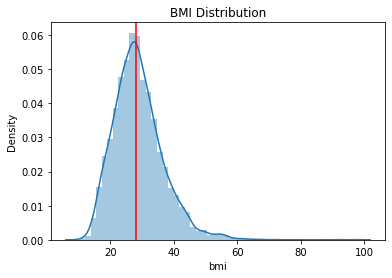

In [24]:
sns.distplot(df['bmi']).set(title="BMI Distribution")
plt.axvline(x=df.bmi.median(), color='red')
print("Median: ", df.bmi.median())

#### BMI INFERENCE

- The bmi distribution is skewed right.
- Majority of patients have a bmi between 20 and 40.
- The median of the distribution is 28.4

## BIVARIATE ANALYSIS

[Text(0.5, 1.0, 'Stroke Distribution by Gender')]

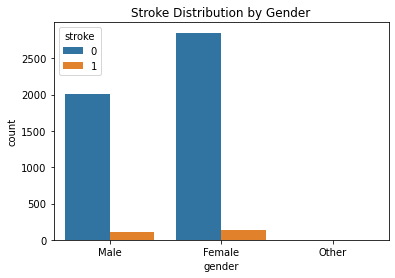

In [25]:
sns.countplot(data=df, x='gender', hue='stroke').set(title="Stroke Distribution by Gender")

#### INFERENCES

- Very small portion of both males and females in the dataset experienced stroke.
- It seems that the amount of those who experienced stroke in both genders is about the same.

[Text(0.5, 1.0, 'Stroke Distribution by Hypertension')]

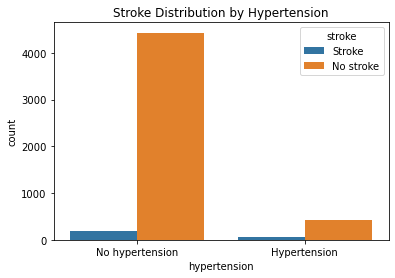

In [26]:
sns.countplot(data=eda_df, x='hypertension', hue='stroke').set(title="Stroke Distribution by Hypertension")

#### INFERENCES

- Patients that did not suffer from hypertension had a larger number of stroke cases than those that did have hypertension.


[Text(0.5, 1.0, 'Stroke Distribution by Heart Disease')]

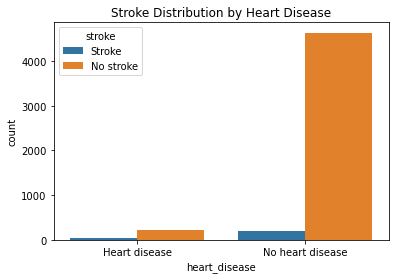

In [27]:
sns.countplot(data=eda_df, x='heart_disease', hue='stroke').set(title="Stroke Distribution by Heart Disease")

#### INFERENCES

-  There were sizably more patients that experienced a stroke and didn't have heart disease than those who had both.

[Text(0.5, 1.0, 'Stroke Distribution by Marriage Status')]

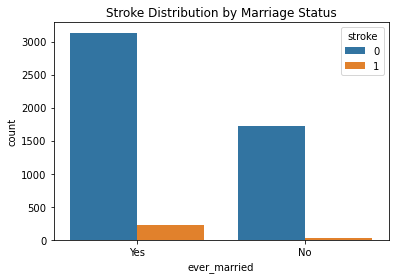

In [28]:
sns.countplot(data=df, x='ever_married', hue='stroke').set(title="Stroke Distribution by Marriage Status")

#### INFERENCES

-  Greater amount of patients that were married experienced stroke than those that were not married

[Text(0.5, 1.0, 'Stroke Distribution by Work Type')]

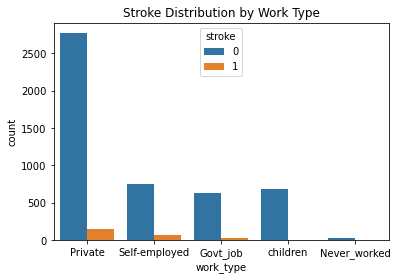

In [29]:
sns.countplot(data=df, x='work_type', hue='stroke').set(title="Stroke Distribution by Work Type")

#### INFERENCES

-  Most of the patients who experienced strokes worked in private jobs.4
-  Most people who had a stroke work at a private company

[Text(0.5, 1.0, 'Stroke Distribution by Residence Type')]

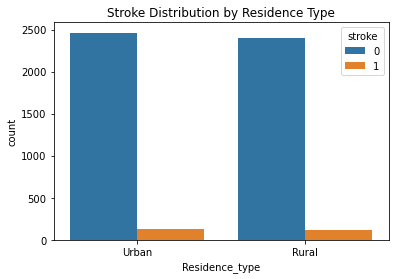

In [30]:
sns.countplot(data=df, x='Residence_type', hue='stroke').set(title="Stroke Distribution by Residence Type")

#### INFERENCES

-  Similar amount of patients from both urban and rural areas that experienced stroke.

[Text(0.5, 1.0, 'Stroke Distribution by Smoking Status')]

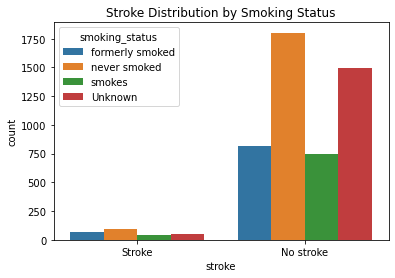

In [31]:
sns.countplot(data=eda_df, x='stroke', hue='smoking_status').set(title="Stroke Distribution by Smoking Status")

#### INFERENCES

-  Smoking status has little influence on the probability of having a stroke.

### MULTIVARIATE ANALYSIS

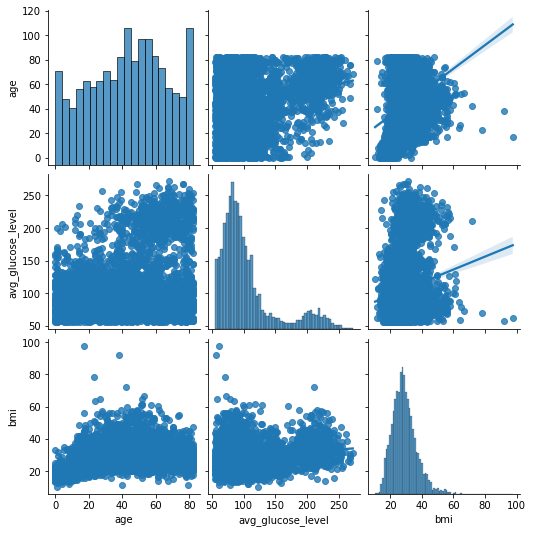

In [32]:
sns.pairplot(df, vars=["age", "avg_glucose_level","bmi"],kind="reg")

#### INFERENCES

-  The pairplot indicates that there is a positive association between bmi and age, and bmi and average glucose level.

##  CORRELATION ANALYSIS

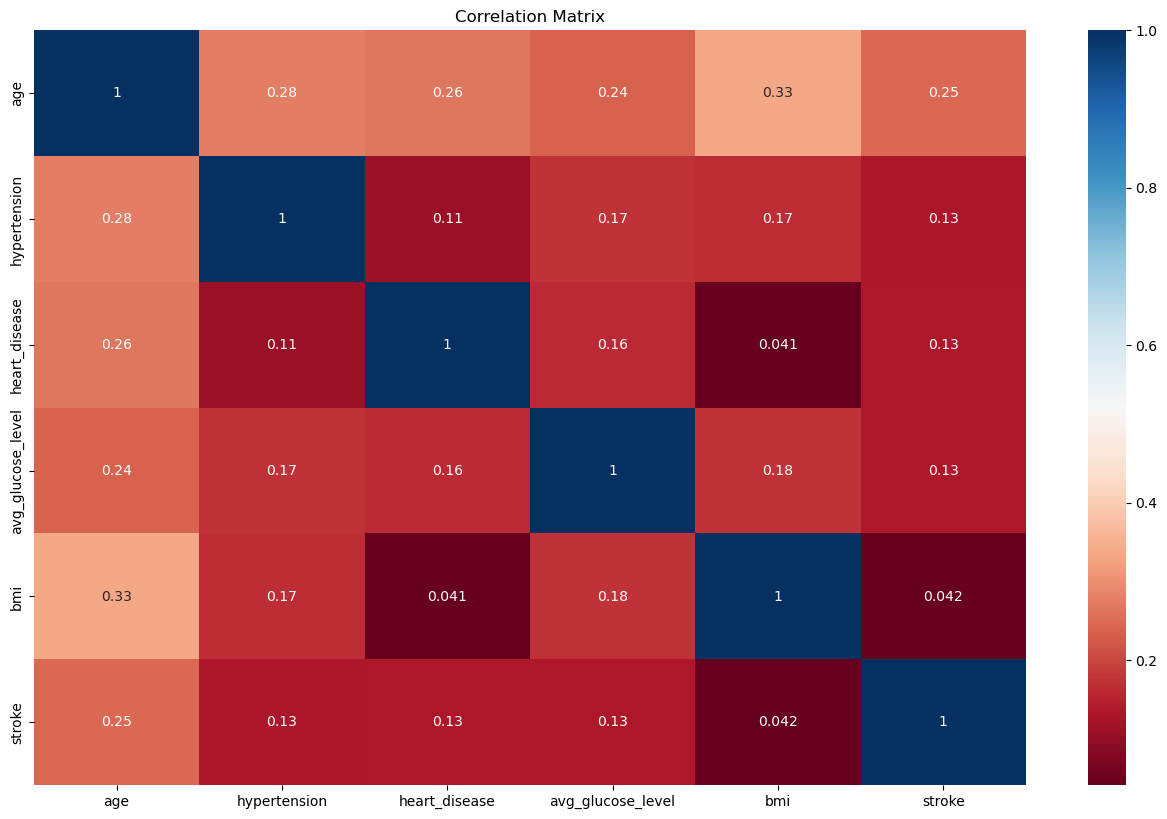

In [33]:
# get correlation matrix

plt.figure(figsize = (16,10), dpi=100)
sns.heatmap(df.corr(), annot = True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.show()

#### INFERENCES
- Age shows the strongest correlation with dependent feature stroke.
- BMI is weakly correlated with dependent feature stroke stroke. 
- Age positivly correlates with 'hypertension', 'heart desease', 'avg_glucose_level'. So all of them tends to increase with an increase in age.

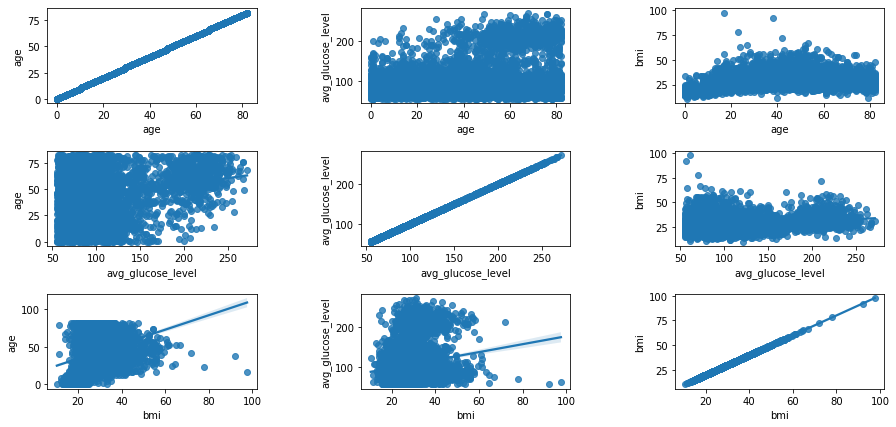

In [34]:
plt.figure(1, figsize=(15,7))
n = 0
for x in ['age','avg_glucose_level','bmi']:
    for y in ['age','avg_glucose_level','bmi']:
        n += 1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data = df)
        plt.ylabel(y.split()[0] + ' ' + y.split()[1] if len(y.split()) > 1 else y)

plt.show()

#### INFERENCES

- As we can see that the higher body mass index you get the higher average glucose level
- We can also see that the the older you get the higher your body mass index will be

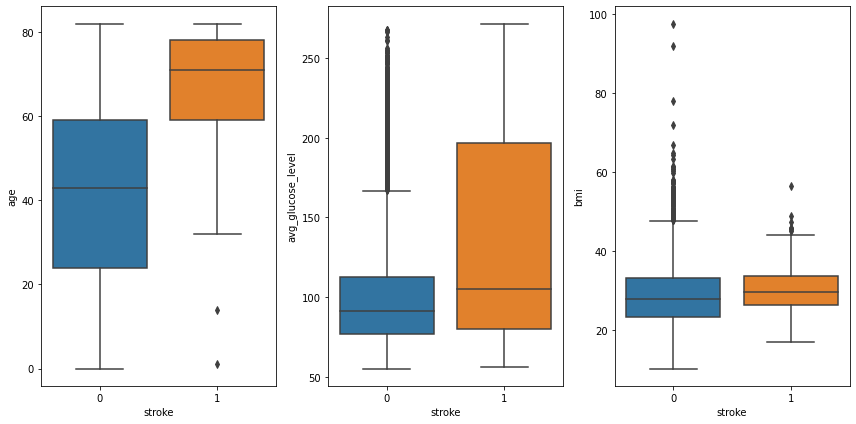

In [36]:
column_list = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(12,6))

for i, col in enumerate(column_list):
  sns.boxplot(data=df, x='stroke', y=col, ax=ax[i])

plt.tight_layout()
plt.show()

#### INFERENCES
- Most patients who have had a stroke are over the age of 60.
- But, it's still possible that younger people can also experience it, as we can see there are some outliers
- We can assume that the age of the patient has a correlation whether the patient had a stroke or not